# 🚗 Car Purchase Prediction using Machine Learning

This project predicts a **car purchase amount** based on demographic and financial features.  
We’ll explore the dataset, visualize relationships, and compare regression models.

### Workflow
1. Data Loading & Cleaning  
2. Exploratory Data Analysis (EDA)  
3. Feature Engineering  
4. Model Training (Linear, Decision Tree, Random Forest, Gradient Boosting, SVR)  
5. Model Evaluation and Comparison  

**Dataset:** `Car_Purchasing_Data.csv`


In [36]:
# Import core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning utilities
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

# Evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')


In [37]:
# Load dataset (with latin1 encoding to avoid decoding errors)
df = pd.read_csv(r"D:\NetsmartzAcademy\Lab\Datasets\Car_Purchasing_Data.csv",encoding="latin1")

print(f"Shape of dataset: {df.shape}\n")
print("Missing values per column:\n", df.isnull().sum())

# Display top records
df.head()


Shape of dataset: (500, 9)

Missing values per column:
 Customer Name          0
Customer e-mail        0
Country                0
Gender                 0
Age                    0
Annual Salary          0
Credit Card Debt       0
Net Worth              0
Car Purchase Amount    0
dtype: int64


,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [38]:
# Drop non-useful columns for prediction
df.drop(["Customer Name", "Customer e-mail"], axis=1, inplace=True)

# Encode 'Country' into numeric labels
le_country = LabelEncoder()
df["Country"] = le_country.fit_transform(df["Country"])

# Convert Gender to numeric (Male=1, Female=0)
df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0}).fillna(0)

print("✅ Cleaned Columns:", df.columns.tolist())
df.head()


✅ Cleaned Columns: ['Country', 'Gender', 'Age', 'Annual Salary', 'Credit Card Debt', 'Net Worth', 'Car Purchase Amount']


,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,27,0.0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,17,0.0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,1,0.0,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,41,0.0,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,26,0.0,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [39]:
# Display summary statistics to understand feature ranges
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Country,500.0,102.682000,60.388263,0.0,52.000000,100.500000,156.000000,210.0
Gender,500.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
Age,500.0,46.241674,7.978862,20.0,40.949969,46.049901,51.612263,70.0
Annual Salary,500.0,62127.239608,11703.378228,20000.0,54391.977195,62915.497035,70117.862005,100000.0
Credit Card Debt,500.0,9607.645049,3489.187973,100.0,7397.515792,9655.035568,11798.867487,20000.0
Net Worth,500.0,431475.713625,173536.756340,20000.0,299824.195900,426750.120650,557324.478725,1000000.0
Car Purchase Amount,500.0,44209.799218,10773.178744,9000.0,37629.896040,43997.783390,51254.709517,80000.0


In [40]:
# Display descriptive statistics to understand data distribution
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Country,500.0,102.682000,60.388263,0.0,52.000000,100.500000,156.000000,210.0
Gender,500.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
Age,500.0,46.241674,7.978862,20.0,40.949969,46.049901,51.612263,70.0
Annual Salary,500.0,62127.239608,11703.378228,20000.0,54391.977195,62915.497035,70117.862005,100000.0
Credit Card Debt,500.0,9607.645049,3489.187973,100.0,7397.515792,9655.035568,11798.867487,20000.0
Net Worth,500.0,431475.713625,173536.756340,20000.0,299824.195900,426750.120650,557324.478725,1000000.0
Car Purchase Amount,500.0,44209.799218,10773.178744,9000.0,37629.896040,43997.783390,51254.709517,80000.0


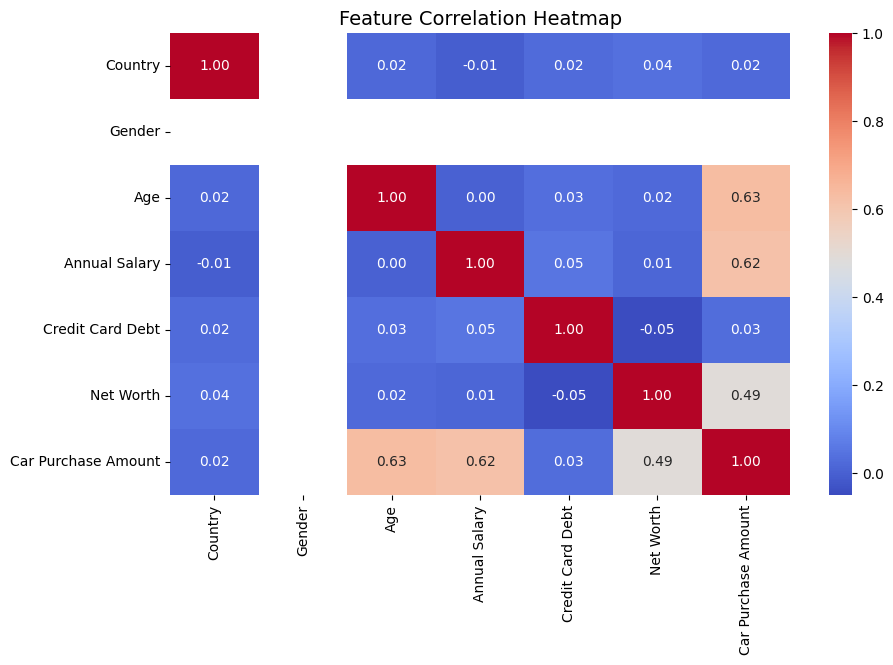

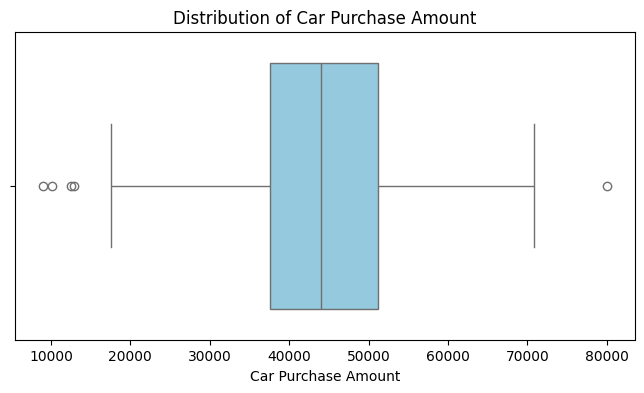

In [41]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()

# Boxplot of target to inspect spread/outliers
plt.figure(figsize=(8,4))
sns.boxplot(x=df["Car Purchase Amount"], color="skyblue")
plt.title("Distribution of Car Purchase Amount")
plt.show()


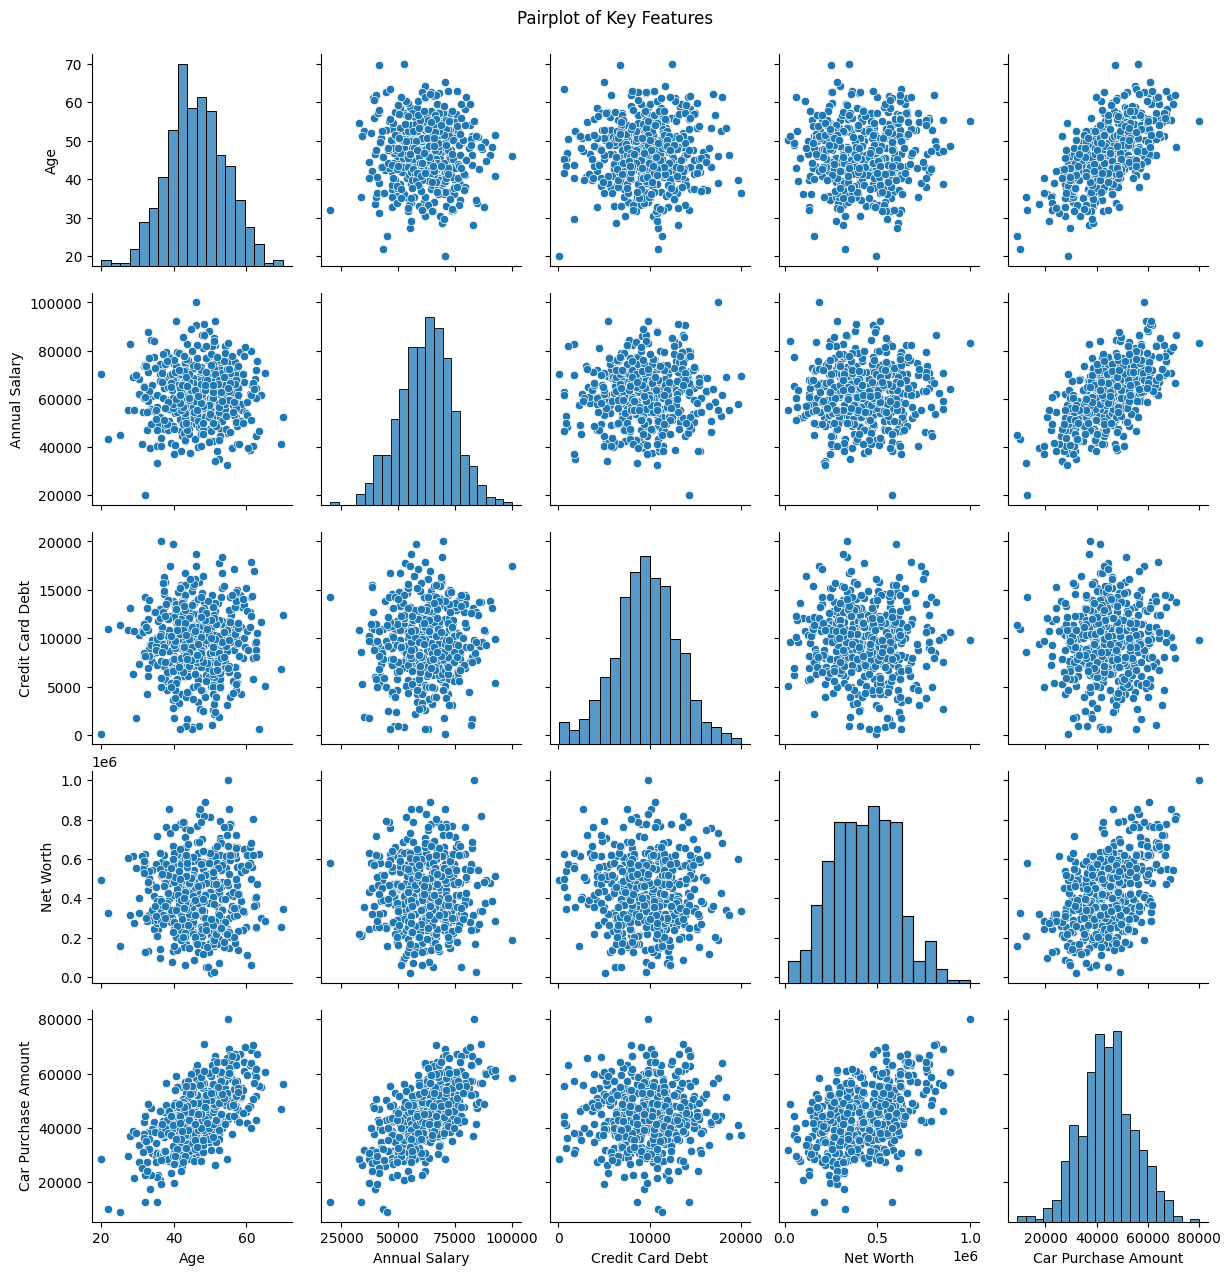

In [42]:
# Pairwise relationships between key numerical features
sns.pairplot(df[['Age', 'Annual Salary', 'Credit Card Debt', 'Net Worth', 'Car Purchase Amount']])
plt.suptitle("Pairplot of Key Features", y=1.02)
plt.show()


In [44]:
# Define features and target variable
X = df.drop("Car Purchase Amount", axis=1)
y = df["Car Purchase Amount"]

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Samples: {X_train.shape[0]}")
print(f"Testing Samples: {X_test.shape[0]}")


Training Samples: 400
Testing Samples: 100


In [45]:
# Standardize features for algorithms sensitive to scale (e.g., SVR)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [46]:
# Helper to train a model and print key evaluation metrics
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    
    print(f"{model.__class__.__name__}:")
    print(f"   MAE = {mae:.2f} | RMSE = {rmse:.2f} | R² = {r2:.3f}\n")
    return {"Model": model.__class__.__name__, "MAE": mae, "RMSE": rmse, "R2": r2}


In [47]:
# Initialize multiple regression models
models = [
    LinearRegression(),
    DecisionTreeRegressor(random_state=42),
    RandomForestRegressor(n_estimators=150, random_state=42),
    GradientBoostingRegressor(random_state=42),
    SVR(kernel='rbf')
]

results = []

# Train and evaluate each model
for m in models:
    # For SVR use scaled data; for others, use raw
    if isinstance(m, SVR):
        results.append(evaluate_model(m, X_train_scaled, y_train, X_test_scaled, y_test))
    else:
        results.append(evaluate_model(m, X_train, y_train, X_test, y_test))

# Store results in a DataFrame
results_df = pd.DataFrame(results)
results_df


LinearRegression:
   MAE = 1.15 | RMSE = 1.44 | R² = 1.000

DecisionTreeRegressor:
   MAE = 2918.74 | RMSE = 3706.40 | R² = 0.873

RandomForestRegressor:
   MAE = 1670.02 | RMSE = 2377.16 | R² = 0.948

GradientBoostingRegressor:
   MAE = 1140.79 | RMSE = 1547.88 | R² = 0.978

SVR:
   MAE = 8412.04 | RMSE = 10463.43 | R² = -0.014



,Model,MAE,RMSE,R2
0,LinearRegression,1.152142,1.440662,1.000000
1,DecisionTreeRegressor,2918.742451,3706.399510,0.872770
2,RandomForestRegressor,1670.020795,2377.155191,0.947664
3,GradientBoostingRegressor,1140.789681,1547.878673,0.977810
4,SVR,8412.044496,10463.425901,-0.013986


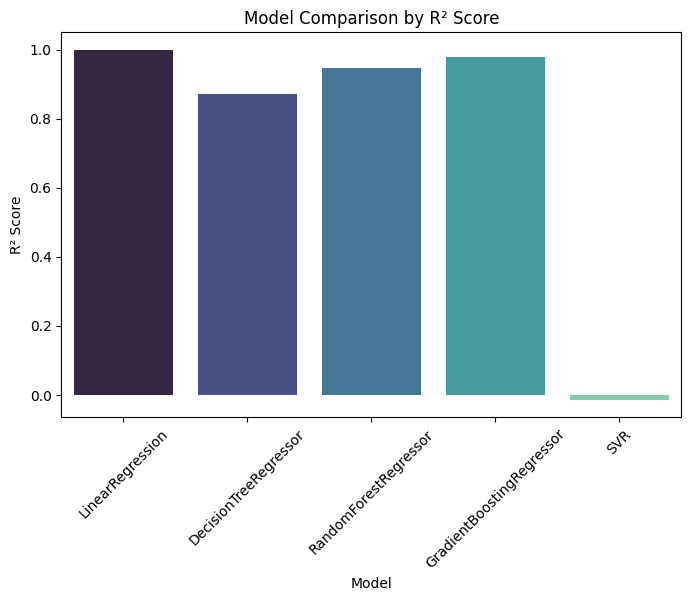

In [48]:
# Visual comparison of R² scores across models
plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="R2", data=results_df, palette="mako")
plt.title("Model Comparison by R² Score")
plt.ylabel("R² Score")
plt.xticks(rotation=45)
plt.show()


# ✅ Summary

- **Gradient Boosting** and **Random Forest** typically perform best for this dataset.  
- **Linear Regression** gives a quick baseline.  
- Feature scaling is essential for SVR.  
- Future improvements can include:
  - Hyperparameter tuning (GridSearchCV / RandomizedSearchCV)
  - Feature importance visualization
  - Deployment using Flask or Streamlit
